<a href="https://colab.research.google.com/github/sunithasharma19/Predict-Man-of-Match-FIFA-2018/blob/master/Predict_Man_of_Match_FIFA_2018%2012%20Jul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement : Predict FIFA 2018 Man of the Match

We have a detailed summary of each Teams game


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [33]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/FIFA%202018%20Statistics.csv')                                                 
data

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
5,15-06-2018,Iran,Morocco,1,36,8,2,5,1,2,0,22,2,86,194,100,14,3,0,0,Yes,90.0,Group Stage,No,0,NaN,NaN
6,15-06-2018,Portugal,Spain,3,39,8,3,2,3,4,1,13,2,87,366,102,12,1,0,0,No,4.0,Group Stage,No,0,NaN,NaN
7,15-06-2018,Spain,Portugal,3,61,12,5,5,2,5,3,13,0,93,727,103,10,1,0,0,Yes,24.0,Group Stage,No,0,NaN,NaN
8,16-06-2018,France,Australia,2,51,12,5,4,3,5,0,19,1,87,484,103,16,1,0,0,Yes,58.0,Group Stage,No,0,NaN,NaN
9,16-06-2018,Australia,France,1,49,4,1,2,1,1,0,16,4,85,390,111,19,3,0,0,No,62.0,Group Stage,No,0,1.0,81.0


In [0]:
data.shape

(128, 27)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
Date                      128 non-null object
Team                      128 non-null object
Opponent                  128 non-null object
Goal Scored               128 non-null int64
Ball Possession %         128 non-null int64
Attempts                  128 non-null int64
On-Target                 128 non-null int64
Off-Target                128 non-null int64
Blocked                   128 non-null int64
Corners                   128 non-null int64
Offsides                  128 non-null int64
Free Kicks                128 non-null int64
Saves                     128 non-null int64
Pass Accuracy %           128 non-null int64
Passes                    128 non-null int64
Distance Covered (Kms)    128 non-null int64
Fouls Committed           128 non-null int64
Yellow Card               128 non-null int64
Yellow & Red              128 non-null int64
Red                       128 non-nul

All data types are numeric except for Date, Team, Opponent, Man of the Match, Round, PSO.  

1st Goal, Own goals,Own goal Time are Float Values and have some Null Values.

In [0]:
numerical_features   = data.select_dtypes(include = [np.number]).columns
categorical_features = data.select_dtypes(include= [np.object]).columns


In [0]:
numerical_features

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red', '1st Goal',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

In [0]:
categorical_features

Index(['Date', 'Team', 'Opponent', 'Man of the Match', 'Round', 'PSO'], dtype='object')

In [0]:
data.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,82.554688,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,5.933766,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,67.000000,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,79.000000,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,83.000000,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,87.000000,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,94.000000,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


[]

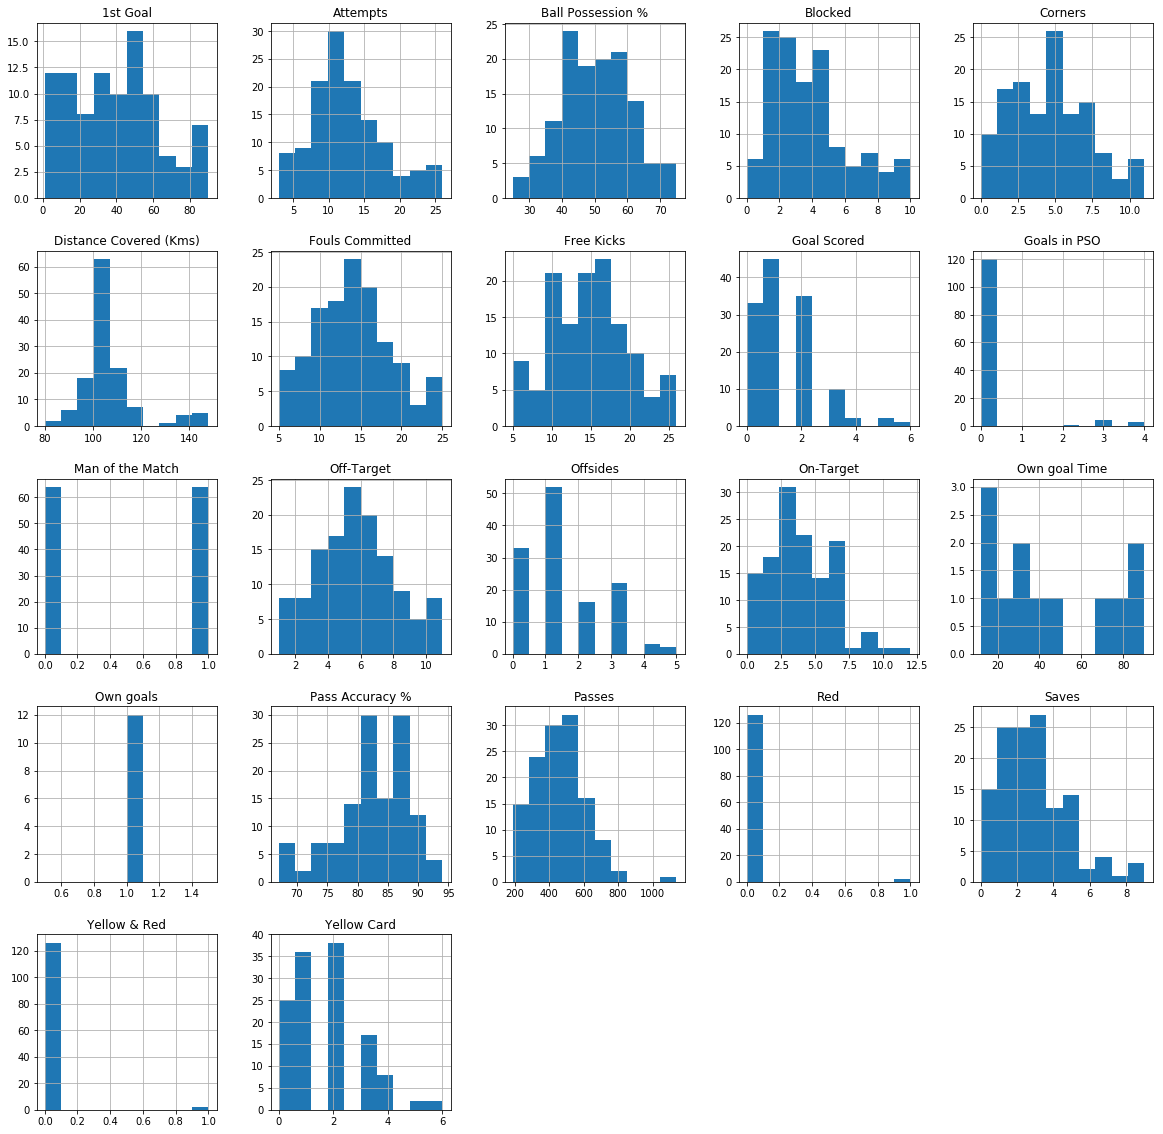

In [0]:
data.hist(figsize=(20,20))
plt.plot()

In [0]:
skew_values = skew(data[numerical_features], nan_policy = 'omit')
pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)


,Features,Skewness degree
0,Goal Scored,1.132232
1,Ball Possession %,0.002204
2,Attempts,0.645828
3,On-Target,0.792629
4,Off-Target,0.279919
5,Blocked,0.942771
6,Corners,0.302464
7,Offsides,0.819830
8,Free Kicks,0.098830
9,Saves,0.934101


For normally distributed data, the skewness should be about 0. 
For unimodal continuous distributions, a skewness value > 0 means that there is more weight in the right tail of the distribution.
The function skewtest can be used to determine if the skewness value is close enough to 0, statistically speaking.
Although data is not normally distribute, there are positive as well have negative skewedness
'Yello & Red', 'Red' and 'Goals in PSO' are highly positively skewed.

In [0]:
# Missing values

missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
Own goal Time,116,90.6250
Own goals,116,90.6250
1st Goal,34,26.5625
Free Kicks,0,0.0000
Team,0,0.0000
Opponent,0,0.0000
Goal Scored,0,0.0000
Ball Possession %,0,0.0000
Attempts,0,0.0000
On-Target,0,0.0000


Own goal Time, Own goals, 1st Goal have missing Values
The Missing Values Percentage for Own goal Time and Own Goals is 90.6
The 1st Goal Missing Values Percentage is  26.5


In [0]:
# Convert target variable 'Man of the match' into binary format
 # Let's convert the Man of the Match data to numerical type #
  
data['Man of the Match'] = data['Man of the Match'].map({'Yes': 1, 'No': 0})

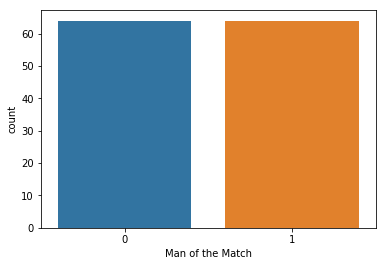

In [0]:
sns.countplot(x = 'Man of the Match', data = data)

The Visualizing the Countplot we see the Number of Yes and Number of No for Man of the Match are equally distributed

Correlation Analysis

We need to now Understand how statistics of one feature is impacted in presence of other features
      The Commonly used tools are:
    - Pearson Correlation Coefficient (or) scatter plots
    - Pairplots
    
 Pearson's Correlation Coefficient
 
Correlation is a technique for investigating the relationship between two quantitative, continuous variables. Pearson's correlation coefficient (r) is a measure of the strength of the association between the two variables.

The first step in studying the relationship between two continuous variables is to draw a scatter plot of the variables to check for linearity. The correlation coefficient should not be calculated if the relationship is not linear.

The independent (or explanatory) variable is plotted on the x-axis (horizontally) and the dependent (or response) variable is plotted on the y-axis (vertically).

The nearer the scatter of points is to a straight line, the higher the strength of association between the variables. Also, it does not matter what measurement units are used.

Values of Pearson's correlation coefficient
Pearson's correlation coefficient (r) for continuous (interval level) data ranges from -1 to +1:

r = -1    data lie on a perfect straight line with a negative slope
r = 0     no linear relationship between the variables
r = +1   data lie on a perfect straight line with a positive slope
Positive correlation indicates that both variables increase or decrease together, whereas negative correlation indicates that as one variable increases, so the other decreases, and vice versa.

Let's understand relations of each of features with respect to 'Man of the match' closely using scatter plot.
Scatter plot is another great tool to see correlation degree and direction among features. Using seaborn pairplot makes this task easy for us by plotting all possible combinations.

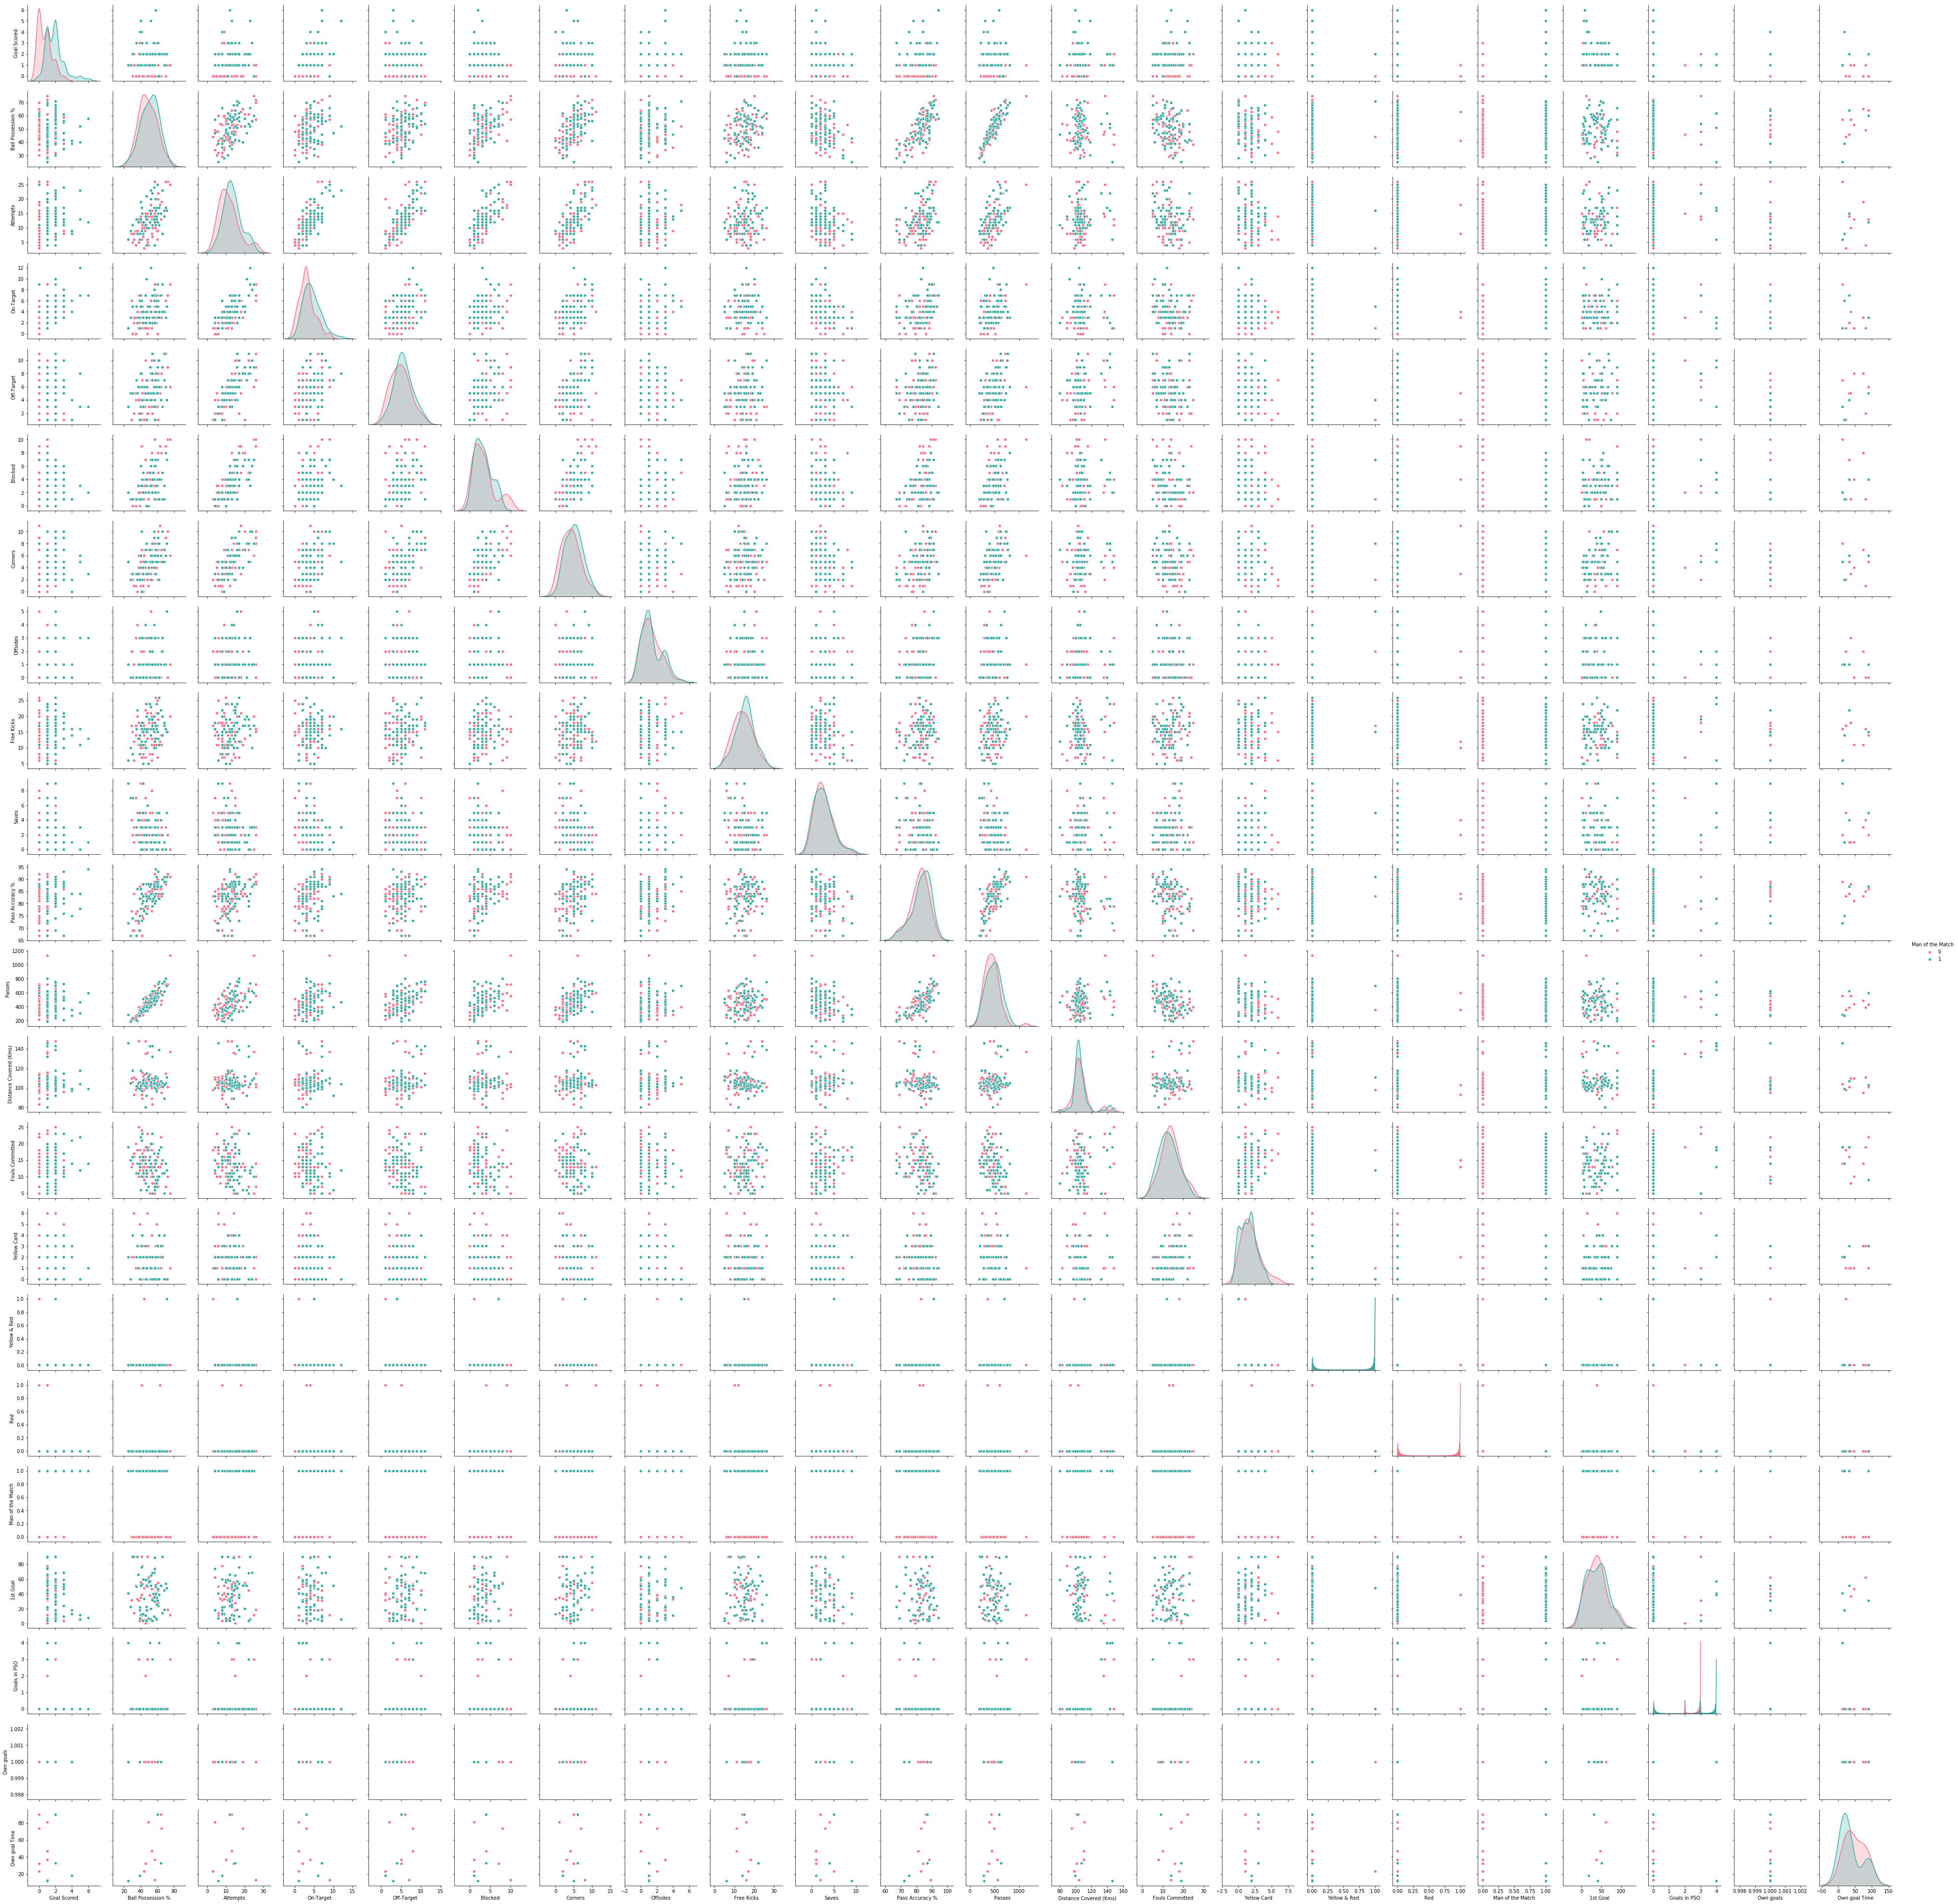

In [0]:

sns.pairplot(data, hue = 'Man of the Match', palette="husl")
plt.show()

As per the above Visualization  : The Highly Correlated  Featured with 'Man of the Match'  are  'Goal Scored', 'On-Target', 'Corners', 'Attempts', 'Free Kicks', 'Yellow Card', 'Red', 'Fouls Committed'

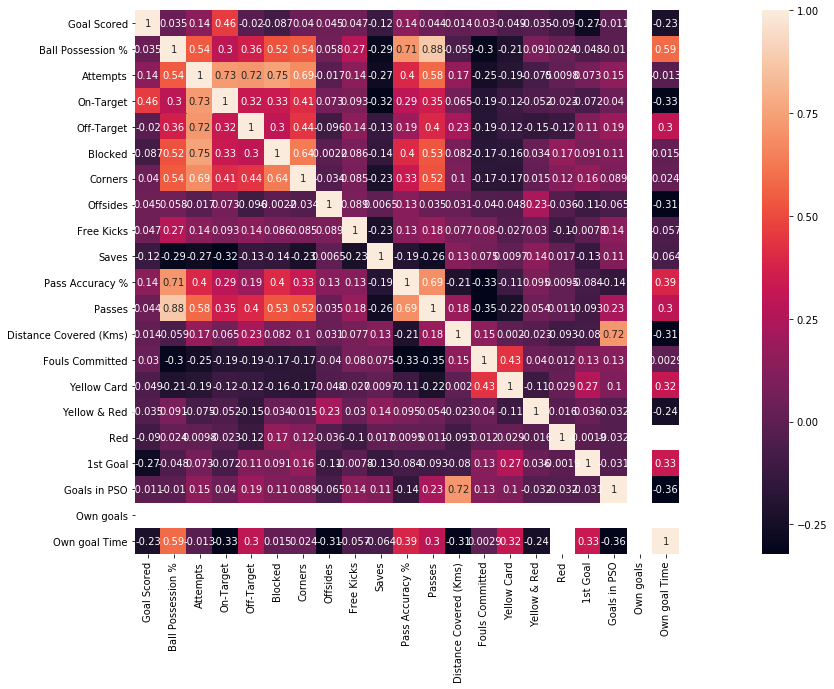

In [0]:
plt.figure(figsize=(30,10))
sns.heatmap(data[numerical_features].corr(), square=True, annot=True,robust=True, yticklabels=1)


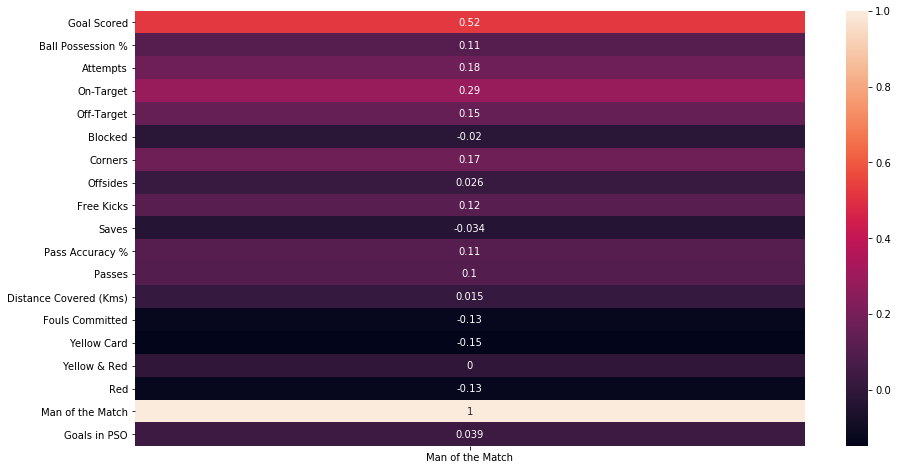

In [51]:
var = ['Man of the Match','Goal Scored', 'On-Target', 'Corners', 'Attempts', 'Free Kicks', 'Yellow Card', 'Red', 
       'Fouls Committed', 'Own goal Time']
corr = data.corr()
corr = corr.filter(items = ['Man of the Match'])
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)


'Man of the Match' is highly correlated with 'Goal Scored', 'Attempts' , 'On-Target',  'Off-Target' ,  'Corners',  'free Kicks', 'Yellow Card', 'Red', 'Fouls Committed', 'Own goal Time'
Own goal Time  is   -0.1   'Ball possession %', and Passes, pass Accuracy is 0.1

These features have least or no correlation with 'Man of the Match'
'Blocked', 'OffSides', 'Saves','Distance Covered (Kms)', 'Yellow & Red', '1st Goal', 'Goals in PSO'
These features will not have impact on our analysis 

Features contributing values in 'Orange' , 'Pink' , 'Black' and 'Dark black' boxes can lead to multi-collinearity.

Outliers Detection and  Removal

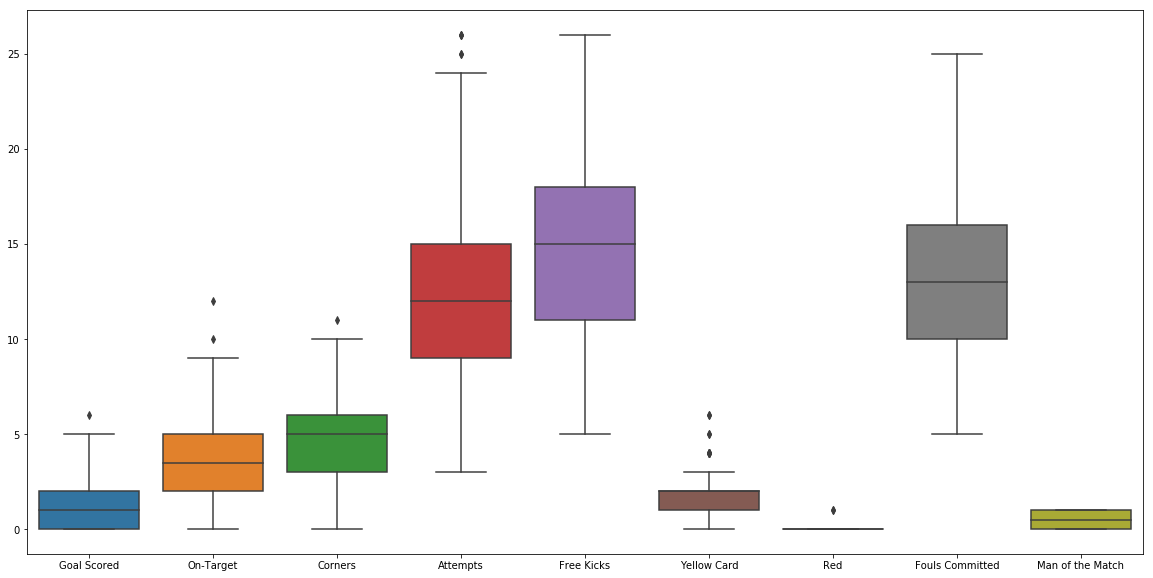

In [0]:
var1 = ['Goal Scored', 'On-Target', 'Corners', 'Attempts', 'Free Kicks', 'Yellow Card', 'Red', 'Fouls Committed']
var1.append('Man of the Match')
dummy_data = data[var1]
plt.figure(figsize=(20,10))
sns.boxplot(data = dummy_data)
plt.show()


As per boxplot there are :
1 outlier in Goal scored
2 in On-Target
1 in corners
2 in Attempts
3 in Yellow Card
1 in Red

In statistics, an outlier is an observation point that is distant from other observations. 
An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set.
For a normally distributed data any value that lies beyond range of 1.5 times IQR (Inter quartile range) is considered to be an outliers.
However, 'outliers = anything > 1.5*IQR' does not worK practically, as real data are not normally distributed.
The quantity of outliers present in this problem is not too huge and will not have gravity impact if left untreated. They are only few and within range

# Missing Values Treatment #

- As 'Own goal Time' and 'Own goals' are having > 90% missing values, filling them with any combination will lead predictive model to false direction. So, dropping them is the best option
- '1st Goal' represents 'When did the team score the 1st goal?'
- Filling 1st Goal  information with mean, median, mode, etc. does not seem to be informative to me, and thus, I will drop this field to rather than using it by filling with uninformative data.
- Note: '1st Goal' is negligebly correlated with 'Man of the Match', hence, dropping this should not have any impact

In [0]:
data.drop(['Own goal Time', 'Own goals', '1st Goal'], axis = 1, inplace= True)

Categorical features encoding

- As machine learning models understand only numbers data in different formats including text and dates needs to be mapped into numbers prior to feeding to the model
- The process of changing non-numerical data into numerical is called 'Encoding'
- Before encoding let's understand how many categories or levels are present in each categorical features

In [41]:
categorical_features

Index(['Date', 'Team', 'Opponent', 'Man of the Match', 'Round', 'PSO'], dtype='object')

In [43]:
def uniqueCategories(x):
    columns = list(x.columns).copy()
    for col in columns:
        print('Feature {} has {} unique values: {}'.format(col, len(x[col].unique()), x[col].unique()))
        print('\n')
uniqueCategories(data[categorical_features].drop('Date', axis = 1))

Feature Team has 32 unique values: ['Russia' 'Saudi Arabia' 'Egypt' 'Uruguay' 'Morocco' 'Iran' 'Portugal'
 'Spain' 'France' 'Australia' 'Argentina' 'Iceland' 'Peru' 'Denmark'
 'Croatia' 'Nigeria' 'Costa Rica' 'Serbia' 'Germany' 'Mexico' 'Brazil'
 'Switzerland' 'Sweden' 'Korea Republic' 'Belgium' 'Panama' 'Tunisia'
 'England' 'Colombia' 'Japan' 'Poland' 'Senegal']


Feature Opponent has 32 unique values: ['Saudi Arabia' 'Russia' 'Uruguay' 'Egypt' 'Iran' 'Morocco' 'Spain'
 'Portugal' 'Australia' 'France' 'Iceland' 'Argentina' 'Denmark' 'Peru'
 'Nigeria' 'Croatia' 'Serbia' 'Costa Rica' 'Mexico' 'Germany'
 'Switzerland' 'Brazil' 'Korea Republic' 'Sweden' 'Panama' 'Belgium'
 'England' 'Tunisia' 'Japan' 'Colombia' 'Senegal' 'Poland']


Feature Man of the Match has 2 unique values: ['Yes' 'No']


Feature Round has 6 unique values: ['Group Stage' 'Round of 16' 'Quarter Finals' 'Semi- Finals' '3rd Place'
 'Final']


Feature PSO has 2 unique values: ['No' 'Yes']




# Categorical data #

Let us address the Categorica Data 1st Goal

In [88]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/FIFA%202018%20Statistics.csv')
data.rename(columns={'1st Goal': 'First_goal_time'},inplace=True)
data.rename(columns={'Man of the Match':'MoM'},inplace=True)
data.MoM = data.MoM.replace(['Yes','No'],[1,0])
data.head()
data

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,MoM,First_goal_time,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,1,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,0,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,0,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,1,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,0,NaN,Group Stage,No,0,1.0,90.0
5,15-06-2018,Iran,Morocco,1,36,8,2,5,1,2,0,22,2,86,194,100,14,3,0,0,1,90.0,Group Stage,No,0,NaN,NaN
6,15-06-2018,Portugal,Spain,3,39,8,3,2,3,4,1,13,2,87,366,102,12,1,0,0,0,4.0,Group Stage,No,0,NaN,NaN
7,15-06-2018,Spain,Portugal,3,61,12,5,5,2,5,3,13,0,93,727,103,10,1,0,0,1,24.0,Group Stage,No,0,NaN,NaN
8,16-06-2018,France,Australia,2,51,12,5,4,3,5,0,19,1,87,484,103,16,1,0,0,1,58.0,Group Stage,No,0,NaN,NaN
9,16-06-2018,Australia,France,1,49,4,1,2,1,1,0,16,4,85,390,111,19,3,0,0,0,62.0,Group Stage,No,0,1.0,81.0


In [90]:
data.First_goal_time = data.First_goal_time.fillna(0)
data.First_goal_time.loc[(data.First_goal_time >= 1) & (data.First_goal_time < 15)] = 1
data.First_goal_time.loc[(data.First_goal_time >= 15) & (data.First_goal_time < 30)] = 2
data.First_goal_time.loc[(data.First_goal_time >= 30) & (data.First_goal_time < 45)] = 3
data.First_goal_time.loc[(data.First_goal_time >= 45) & (data.First_goal_time < 60)] = 4
data.First_goal_time.loc[(data.First_goal_time >= 60) & (data.First_goal_time < 75)] = 5
data.First_goal_time.loc[data.First_goal_time >= 75] = 6
data


,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,MoM,First_goal_time,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,1,1.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,0,0.0,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,0,0.0,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,1,1.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,0,0.0,Group Stage,No,0,1.0,90.0
5,15-06-2018,Iran,Morocco,1,36,8,2,5,1,2,0,22,2,86,194,100,14,3,0,0,1,1.0,Group Stage,No,0,NaN,NaN
6,15-06-2018,Portugal,Spain,3,39,8,3,2,3,4,1,13,2,87,366,102,12,1,0,0,0,1.0,Group Stage,No,0,NaN,NaN
7,15-06-2018,Spain,Portugal,3,61,12,5,5,2,5,3,13,0,93,727,103,10,1,0,0,1,1.0,Group Stage,No,0,NaN,NaN
8,16-06-2018,France,Australia,2,51,12,5,4,3,5,0,19,1,87,484,103,16,1,0,0,1,1.0,Group Stage,No,0,NaN,NaN
9,16-06-2018,Australia,France,1,49,4,1,2,1,1,0,16,4,85,390,111,19,3,0,0,0,1.0,Group Stage,No,0,1.0,81.0


Divided the data into two groups(Group Stage and Tournament)


In [0]:
# Group Stage Data
Group_Stage = data[data.Round == 'Group Stage']
Group_Stage = Group_Stage.drop('Round',axis=1)

# Tournament Data
Tournament = data[data.Round != 'Group Stage']
Tournament = Tournament.drop('Round',axis=1)


Bar Plot


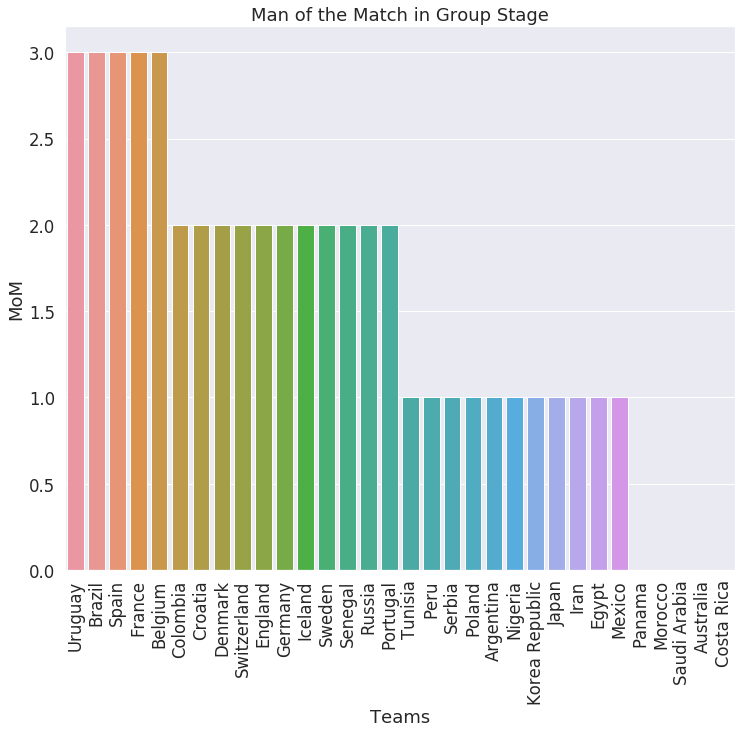

In [92]:
mom = Group_Stage.groupby('Team')['MoM'].sum().reset_index().sort_values(by=('MoM'),ascending=False)

plt.figure(figsize = (12, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="MoM", data=mom)

plot1.set_xticklabels(mom['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='MoM')
plot1.set_title('Man of the Match in Group Stage')
plt.show()


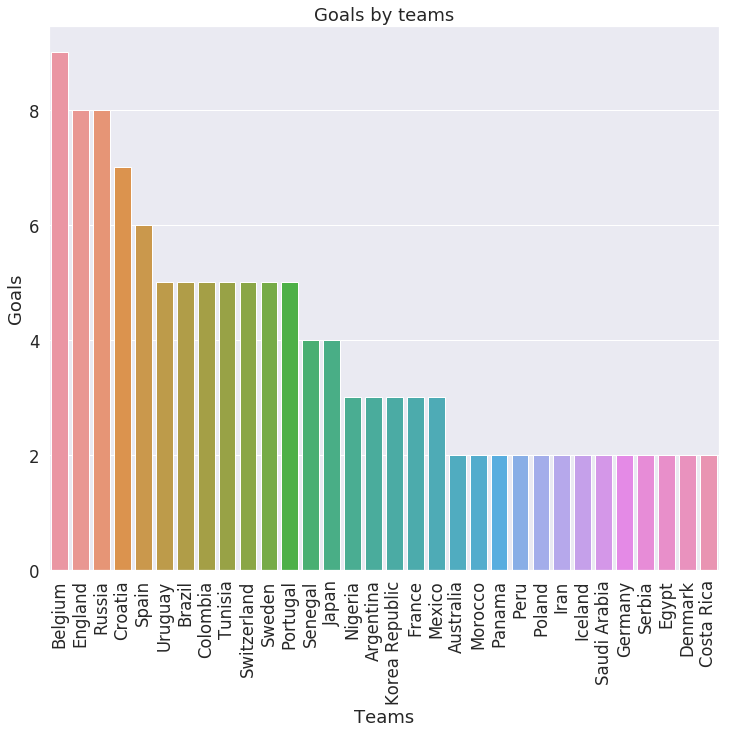

In [94]:
goals = Group_Stage.groupby('Team')['Goal Scored'].sum().reset_index().sort_values(by=('Goal Scored'),ascending=False)

plt.figure(figsize = (12, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Goal Scored", data=goals)

plot1.set_xticklabels(goals['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Goals')
plot1.set_title('Goals by teams')
plt.show()

Post Analysis of Teams in Group Stage we come to a conclusion that 'Uruguay' 'Brazil' 'France' 'Spain' 'Belgium’  'Columbia' 'Croatia' 'Denmark'    'Switzerland' 'England' are the Top Performance Teams


Regplot(Lmplot)

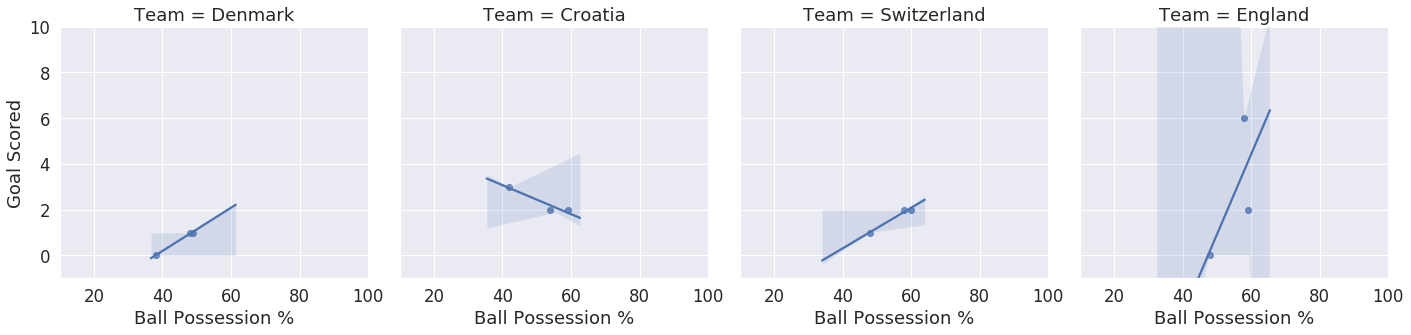

In [105]:
main_Team = Group_Stage.loc[(Group_Stage.Team == 'Columbia') |(Group_Stage.Team == 'Croatia') |(Group_Stage.Team == 'Denmark') | (Group_Stage.Team == 'Switzerland') | (Group_Stage.Team == 'England')]
sns.lmplot(x='Ball Possession %' , y='Goal Scored', data=main_Team, col='Team')
plt.xlim(10,100)
plt.ylim(-1,10)
plt.show()



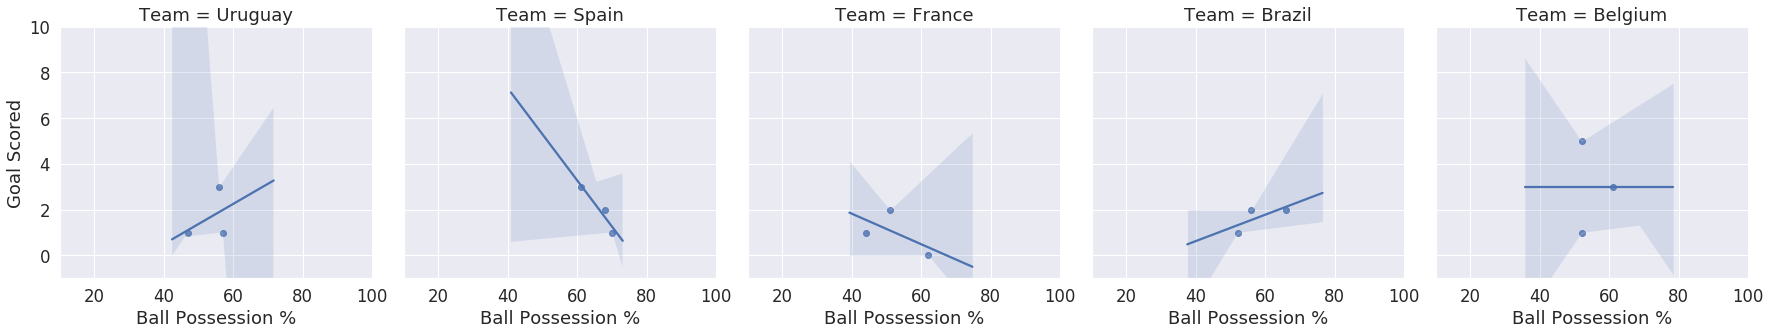

In [106]:
main_Team = Group_Stage.loc[(Group_Stage.Team == 'Uruguay') |(Group_Stage.Team == 'Brazil') |(Group_Stage.Team == 'France') | (Group_Stage.Team == 'Spain') | (Group_Stage.Team == 'Belgium')]
sns.lmplot(x='Ball Possession %' , y='Goal Scored', data=main_Team, col='Team')
plt.xlim(10,100)
plt.ylim(-1,10)
plt.show()

DistPlot

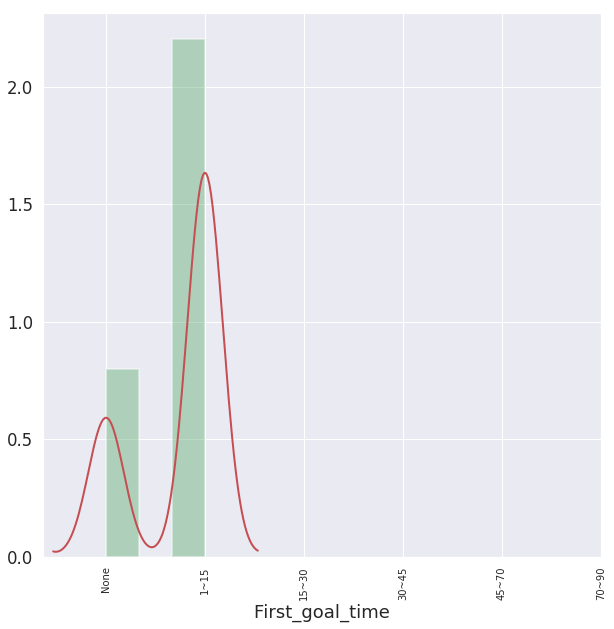

In [107]:
plt.figure(figsize = (10,10))
sns.distplot(data['First_goal_time'], kde_kws={'color':'r','lw':2}, hist_kws={'color':'g','lw':2})
plt.xticks(np.arange(6), ('None', '1~15', '15~30', '30~45', '45~70', '70~90'), fontsize=10, rotation=90)
plt.show()

MoM Prediction in the tournament

In [0]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

Feature Engineering

In [0]:
category = ['Goal Scored','First_goal_time','Ball Possession %','Attempts','On-Target','Blocked','Corners','Offsides','Free Kicks','Saves','Pass Accuracy %','Passes','Distance Covered (Kms)','Fouls Committed']
Group_Stage = data[data.Round == 'Group Stage']
Tournament = data[data.Round != 'Group Stage']

# Train Data
temp = Group_Stage[category].values.reshape((96, 14))
Y = Group_Stage['MoM'].values.reshape((96, 1))

n = int(len(temp)/2)

x_train = np.zeros((n,14))
y_train = np.zeros((n,1))

# Selecting home team data revised by the proportion with each opponent
for i in range(n): 
    x_train[i,0] = temp[2*i,0] - temp[2*i+1,0] # On a goal difference
    x_train[i,1] = temp[2*i,1] - temp[2*i+1,1] # First Goal Time value
    x_train[i,2:] = temp[2*i,2:] / (temp[2*i,2:] + temp[2*i+1,2:]) * 100 # Proportion
    y_train[i] = Y[2*i] 

In [0]:
# Test Data
test = Tournament[category].values.reshape((32, 14))
Y_real = Tournament['MoM'].values.reshape((32, 1))

m = int(len(test)/2)

x_test = np.zeros((m,14))
y_test = np.zeros((m,1))

for i in range(m):
    x_test[i,0] = test[2*i,0] - test[2*i+1,0]
    x_test[i,1] = test[2*i,1] - test[2*i+1,1]
    x_test[i,2:] = test[2*i,2:] = test[2*i,2:] / (test[2*i,2:] + test[2*i+1,2:]) * 100
    y_test[i] = Y_real[2*i]

In [112]:
# Replaced NaN with zero
x_train = np.nan_to_num(x_train)
x_test = np.nan_to_num(x_test)

print(x_train.shape, y_train.shape, x_test.shape)

(48, 14) (48, 1) (16, 14)


Decision Tree

In [0]:
# Decision Tree
decision_tree = tree.DecisionTreeClassifier(random_state=1)
decision_tree_ = decision_tree.fit(x_train, y_train)

# Predict Test Set
y_pred_decision = decision_tree.predict(x_test)

Random Forest

In [0]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_forest = rf.predict(x_test)


Classificaion

In [116]:
import tensorflow as tf
tf.set_random_seed(777)

nb_classes = 3  # 0 ~ 6

X = tf.placeholder(tf.float32, [None, 14])
Y = tf.placeholder(tf.int32, [None, 1]) 
Y_one_hot = tf.one_hot(Y, nb_classes) 
#print("one_hot", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
#print("reshape", Y_one_hot)

W = tf.Variable(tf.random_normal([14, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# Cross entropy loss
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                 labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

W0712 17:48:59.239049 139823243753344 deprecation.py:323] From <ipython-input-116-6816da2afe30>:21: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
# Open Session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(7001):
        sess.run(optimizer, feed_dict={X: x_train, Y: y_train})
        if step % 1000 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={
                                 X: x_train, Y: y_train})
            #print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

    y_pred_soft = sess.run(prediction, feed_dict={X: x_test})    

XG Boost

In [0]:
import xgboost
xgb = xgboost.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)

Accuracy function

In [0]:
# Accuracy
def acc(real, pred):
    count = 0
    m = int(len(real)/2)
    for j in range(m):
        if real[j] == pred[j]:
            count = count + 1

    return print(100*count/m,'%')

In [121]:
# Decision Tree
acc(y_test, y_pred_decision)

# Random Forest
acc(y_test, y_pred_forest)

# Softmax Classification
acc(y_test, y_pred_soft)

# XGBoost
acc(y_test, y_pred_xgb)

75.0 %
62.5 %
87.5 %
87.5 %


We predicted the MoMs simply close to 87 Percentage by Max Classification and XG Boost